In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%autoreload 2

In [51]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from models import QLearning, ExpectedSARSA
from tilecoding import TileCoder
from itertools import product

np.random.seed(33)

In [9]:
# Setup the environment for Mountain-Car-v0
env = gym.make('MountainCar-v0')
env.reset()
print("Action space:", env.action_space.n)
print("State space:", env.observation_space.low)

# value limits per dimension
value_limits = np.array([env.observation_space.low, env.observation_space.high]).T
value_limits = list([tuple(value_limits[i]) for i in range(value_limits.shape[0])])

# Setup the tilecoder
coder = TileCoder(
    tiles_per_dim=[2]*env.observation_space.shape[0],
    value_limits=value_limits,
    tilings=5,
)

Action space: 3
State space: [-1.2  -0.07]


Running Q-Learning with epsilon=0.1 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 40.39it/s]


Running Expected SARSA with epsilon=0.1 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:07<00:00, 35.43it/s]


Running Q-Learning with epsilon=0.1 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 41.27it/s]


Running Expected SARSA with epsilon=0.1 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 35.73it/s]


Running Q-Learning with epsilon=0.1 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 43.52it/s]


Running Expected SARSA with epsilon=0.1 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 36.24it/s]


Running Q-Learning with epsilon=0.01 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 41.76it/s]


Running Expected SARSA with epsilon=0.01 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 36.22it/s]


Running Q-Learning with epsilon=0.01 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 46.45it/s]


Running Expected SARSA with epsilon=0.01 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 39.27it/s]


Running Q-Learning with epsilon=0.01 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:04<00:00, 50.11it/s]


Running Expected SARSA with epsilon=0.01 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 43.29it/s]


Running Q-Learning with epsilon=0.001 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 42.36it/s]


Running Expected SARSA with epsilon=0.001 and alpha=0.25
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 36.31it/s]


Running Q-Learning with epsilon=0.001 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 45.48it/s]


Running Expected SARSA with epsilon=0.001 and alpha=0.125
Trial 1/1 

100%|██████████| 250/250 [00:06<00:00, 37.12it/s]


Running Q-Learning with epsilon=0.001 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:04<00:00, 52.63it/s]


Running Expected SARSA with epsilon=0.001 and alpha=0.0625
Trial 1/1 

100%|██████████| 250/250 [00:05<00:00, 42.06it/s]


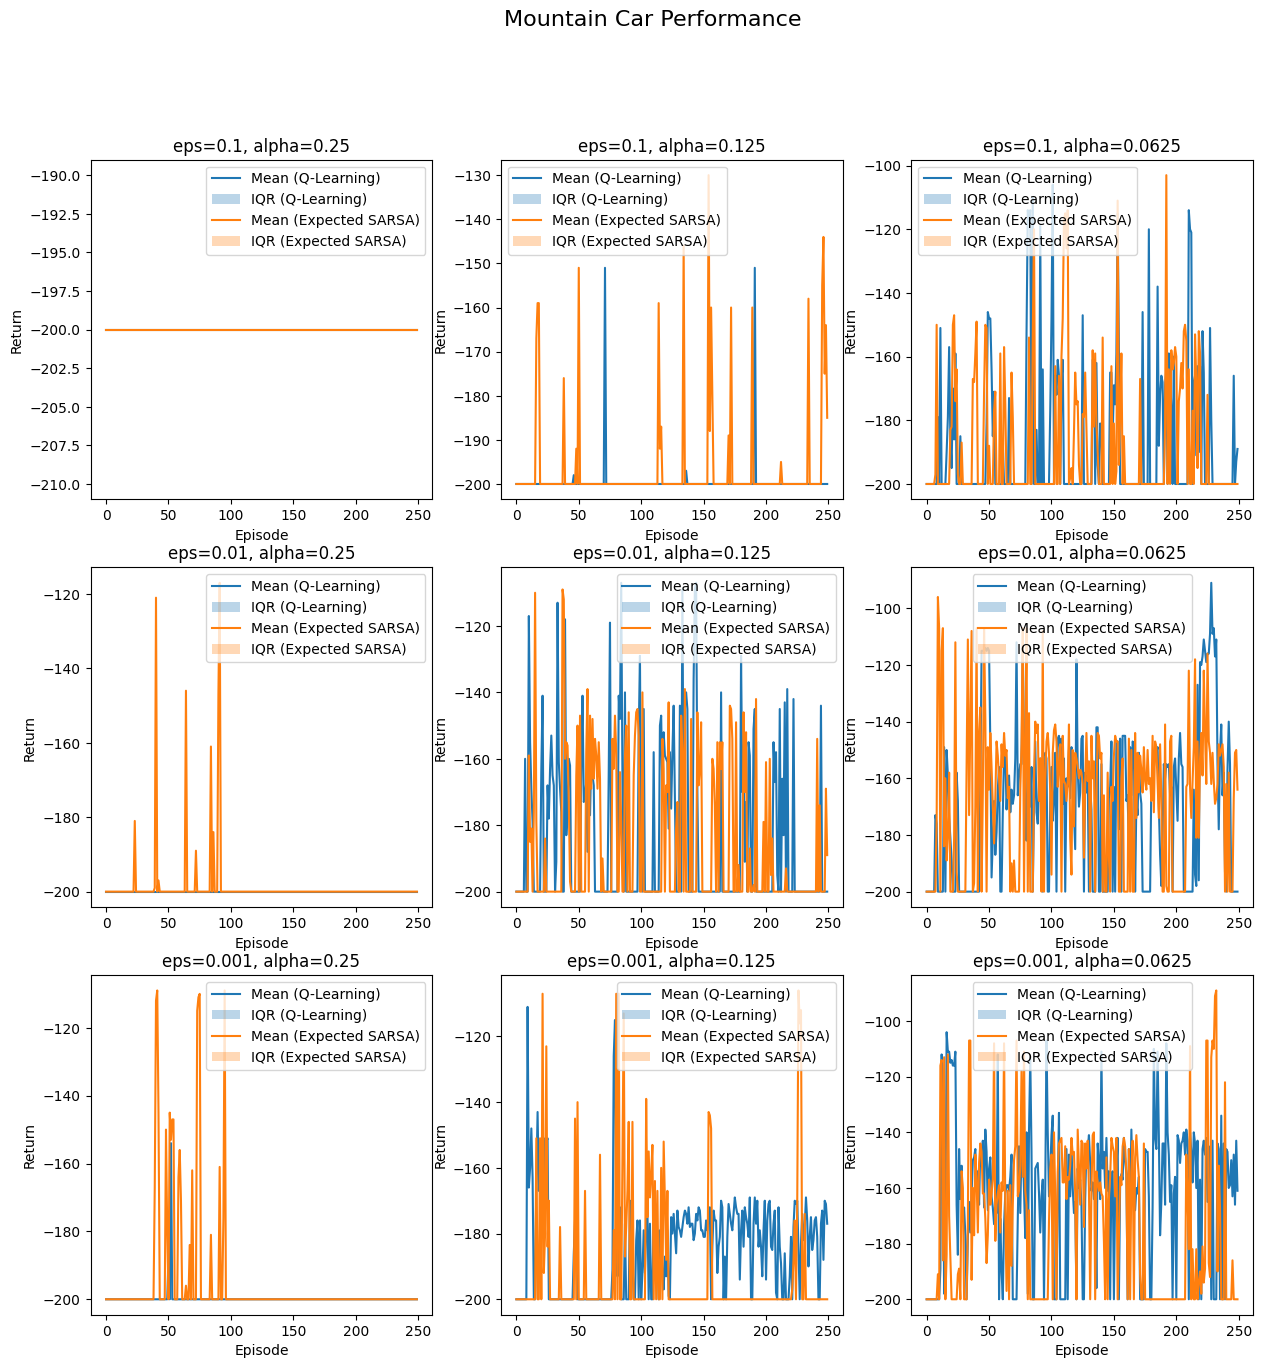

In [52]:
epsilons = [0.1, 0.01, 0.001]
alphas = [1/4, 1/8, 1/16]
num_trials = 1
episodes_per_trial = 250

# Setup plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Mountain Car Performance", fontsize=16)
ax = ax.flatten()

for idx, (eps, alpha) in enumerate(product(epsilons, alphas)):
    ax[idx].set_title(f"eps={eps}, alpha={alpha}")

    print(f"Running Q-Learning with epsilon={eps} and alpha={alpha}")
    qlearner = QLearning(
        env=env,
        coder=coder,
        eps=eps,
        alpha=alpha,
        gamma=1.0,
    )
    returns = qlearner.train(num_trials=num_trials, num_episodes_per_trial=episodes_per_trial)
    qlearner.plot_performance(label=f"Q-Learning", ax=ax[idx], returns=returns)

    print(f"Running Expected SARSA with epsilon={eps} and alpha={alpha}")
    esarsa = ExpectedSARSA(
        env=env,
        coder=coder,
        eps=eps,
        alpha=alpha,
        gamma=1.0,
    )
    returns = esarsa.train(num_trials=num_trials, num_episodes_per_trial=episodes_per_trial)
    esarsa.plot_performance(label=f"Expected SARSA", ax=ax[idx], returns=returns)